## Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

## Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.  Review the data and the provided data set description.  Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

In [109]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
originalmpg = pd.read_csv(url, sep='\s+', names=names)
mpg = originalmpg.copy()
mpg.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [110]:
mpg.fillna('?', inplace=True)

In [111]:
(mpg.Horsepower == '?').sum()

6

In [112]:
mpg['Horsepower'].replace('?', np.NaN, inplace=True)
(mpg.Horsepower == '?').sum()

0

In [113]:
(mpg.Horsepower.isnull()).sum()

6

## The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [114]:
mpg['Origin'].replace({1:'USA', 2:'Asia', 3:'Europe'}, inplace=True)

In [115]:
mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


In [116]:
mpg.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin           object
Car Name         object
dtype: object

In [117]:
mpg['Horsepower'] = mpg['Horsepower'].astype(float)
mpg.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin           object
Car Name         object
dtype: object

## Create a bar chart that shows the distribution for cylinders.

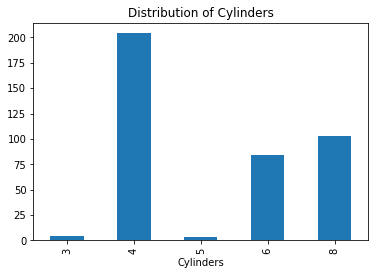

In [118]:
mpg.groupby('Cylinders').size().plot(x = 'Cylinders', kind='bar', title='Distribution of Cylinders')

## Create a scatterplot that shows the relationship between horsepower and weight.

[Text(0, 0.5, 'Weight'),
 Text(0.5, 0, 'Horespower'),
 Text(0.5, 1.0, 'Horsepower to Weigh')]

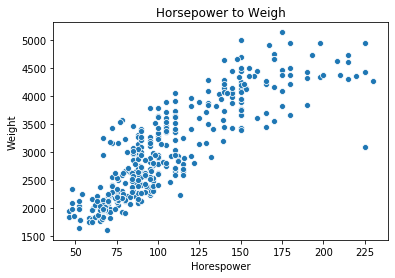

In [119]:
ax = sns.scatterplot(x= 'Horsepower', y= 'Weight', data=mpg)
ax.set(xlabel='Horespower', ylabel='Weight', title= 'Horsepower to Weigh')

## Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

### Is there any link between weight and horsepower?

### Yes, the more a car weighs the the more horsepower it tends to have.